In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

### Sigmoid function 

In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [7]:
x = np.arange(-10,11)
y = sigmoid(x)

In [8]:
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [9]:
y

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01,
       9.99954602e-01])

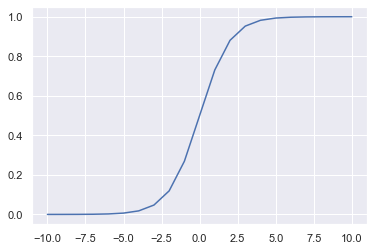

In [8]:
plt.plot(x,y)
plt.show()

### Getting Data

In [2]:
df = pd.read_csv("../../CSV/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


### Check Data Balancing

In [4]:
df["insuranceclaim"].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

###  Visualization

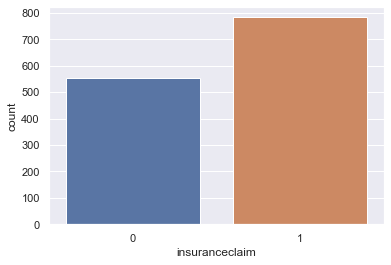

In [11]:
plt.figure()
sns.countplot(data=df,x="insuranceclaim")
plt.show()
# Claim - high

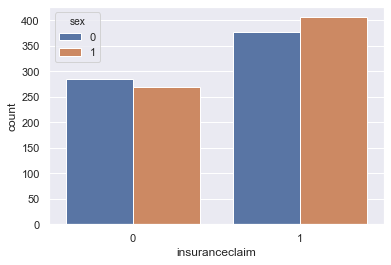

In [13]:
plt.figure()
sns.countplot(data=df,x="insuranceclaim",hue="sex")
plt.show()
# Claim men - high
# Unclaim men - low

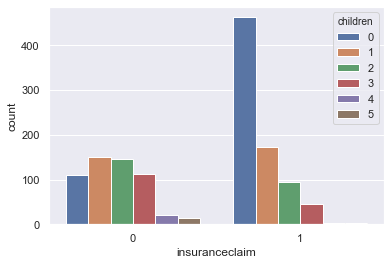

In [15]:
plt.figure()
sns.countplot(data=df,x="insuranceclaim",hue="children")
plt.show()
# People with zero children claim likely to claim more.

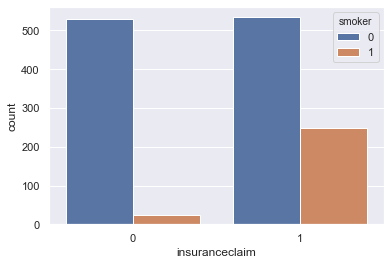

In [17]:
plt.figure()
sns.countplot(data=df,x="insuranceclaim",hue="smoker")
plt.show()
# No-smoker are in numbers in both categories

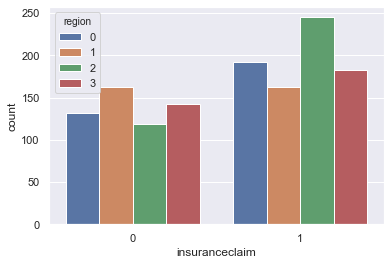

In [20]:
plt.figure()
sns.countplot(data=df,x="insuranceclaim",hue="region")
plt.show()
# region-wise claim for number 2 is more campare to other regions

In [21]:
# Continous Colunms

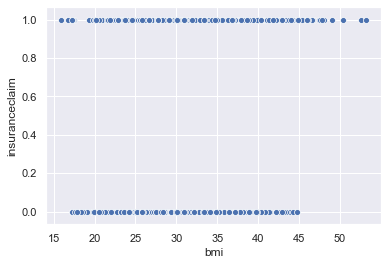

In [23]:
plt.figure()
sns.scatterplot(data=df, x="bmi", y="insuranceclaim")
plt.show()

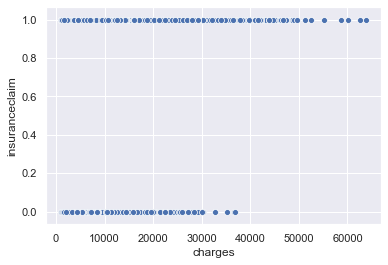

In [24]:
plt.figure()
sns.scatterplot(data=df, x="charges", y="insuranceclaim")
plt.show()
# Charges after 30000 more claimed

### Train-Test-Split

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Baseline model

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression()

In [9]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
lr.score(X_test,y_test)

0.8134328358208955

In [14]:
y_pred = lr.predict(X_test)

In [1]:
y_pred

NameError: name 'y_pred' is not defined

In [ ]:
lr.predict_proba(X_test)

### Evaluation matrics

In [15]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [16]:
accuracy_score(y_test,y_pred)

0.8134328358208955

In [17]:
precision_score(y_test,y_pred)

0.8294573643410853

In [18]:
recall_score(y_test,y_pred)

0.8734693877551021

In [19]:
f1_score(y_test,y_pred)

0.8508946322067595

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       157
           1       0.83      0.87      0.85       245

    accuracy                           0.81       402
   macro avg       0.81      0.80      0.80       402
weighted avg       0.81      0.81      0.81       402



In [24]:
confusion_matrix(y_test,y_pred)

array([[113,  44],
       [ 31, 214]], dtype=int64)

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [31]:
print(tp,fp,"\n",fn,tn)

214 44 
 31 113
